In [30]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import os 
from pathlib import Path 

## Open and View Instance Mask 

In [31]:
path_to_masks = Path("C:\\Users\\cwinklm\\Documents\\Alpacathon\\rendered_HE\\new_renders\\")

Shape of Instance Mask (500, 500)
Unique Values in Instance Mask:  [  0   1   3   4   5   6   7   8   9  10  12  14  15  16  17  19  20  21
  22  23  24  25  26  28  29  30  31  32  33  34  35  36  38  39  40  41
  43  44  47  48  50  51  52  53  54  55  57  58  59  60  61  62  63  65
  66  67  69  70  74  78  79  80  81  82  83  84  85  86  88  89  92  93
  94  98 100 101 102 103 105 106 107 109 110 112 114 118 119 120 121 122
 123 125 126 127 128 131 133 134 135 136 137 138 139 140 141 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 160 161 162 163 164
 165 166 168 170 171 172 173 175 178 179]


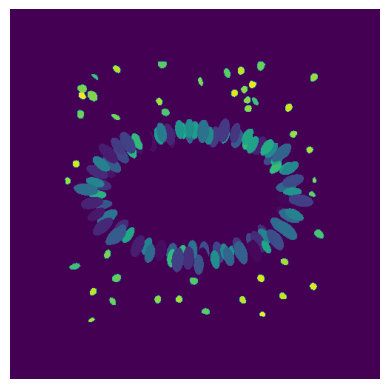

In [32]:
img = np.array(Image.open(path_to_masks.joinpath("instance_mask.png")))

print("Shape of Instance Mask", img.shape)
print("Unique Values in Instance Mask: ", np.unique(img))

plt.imshow(img)
plt.axis("off")
plt.show()


### Combine individual masks to instance mask

In [33]:
all_files = os.listdir(path_to_masks)
single_masks = [file for file in all_files if file.startswith("Nucleus")]

print(len(all_files))
print(len(single_masks))

instance_mask = np.array(Image.open(path_to_masks.joinpath("instance_mask.png")))

184
180


In [34]:
n_overlaps = []
for mask_file in single_masks: 
    mask = np.array(Image.open(path_to_masks.joinpath(single_masks[IDX])))/255 # mask has value 1 for exacly one cell and 0 elsewhere
    
    # IDEA: if a cell is in the front then multiplying the cells single mask with the instance mask will only yield the cell's own ID (and 0 for background).
    # If one other cell overlaps the present cell partly then muliplying should give the IDs of the current cell as well as the one (partly) on top of it.
    # Therefore the number of unique values in the product of the single mask with the instance mask tells us how many cells lie on to of the current cell. 

    # CAVEAT: if the current cell is completely overlapped by another cell the product will also give only one value. to overcome this we need to know the 
    # correct if of each cell, i.e it needs to be part of the filename. 

    n_overlaps.append(len(np.unique(np.multiply(mask, instance_mask)))) # count how many other cells are on top of current cell 

# oderer the mask files such that the list starts with the cells at the bottom
ordered_masks = [x for _, x in sorted(zip(n_overlaps, single_masks))] 
ordered_masks.reverse()

### Reconstruct instance mask

In [35]:
for mask_id, mask_name in enumerate(ordered_masks): 
    mask = np.array(Image.open(path_to_masks.joinpath(mask_name)))
    mask = mask*((mask_id+1)/255)

    #print(np.unique(mask))

    if mask_id == 0: 
       instance_mask_reconstruct = np.zeros_like(mask)
    
    instance_mask_reconstruct += mask 
    # if the sum yields a value gretaer than the present mask_id then we know that an overlap happend. Since by virtue of the previous ordering  
    # the current cell is always on top of all previous ones we can clip the instance mask to the current mask_id
    instance_mask_reconstruct = (np.clip(instance_mask, 0, mask_id+1)).astype(float) 
    



(-0.5, 499.5, 499.5, -0.5)

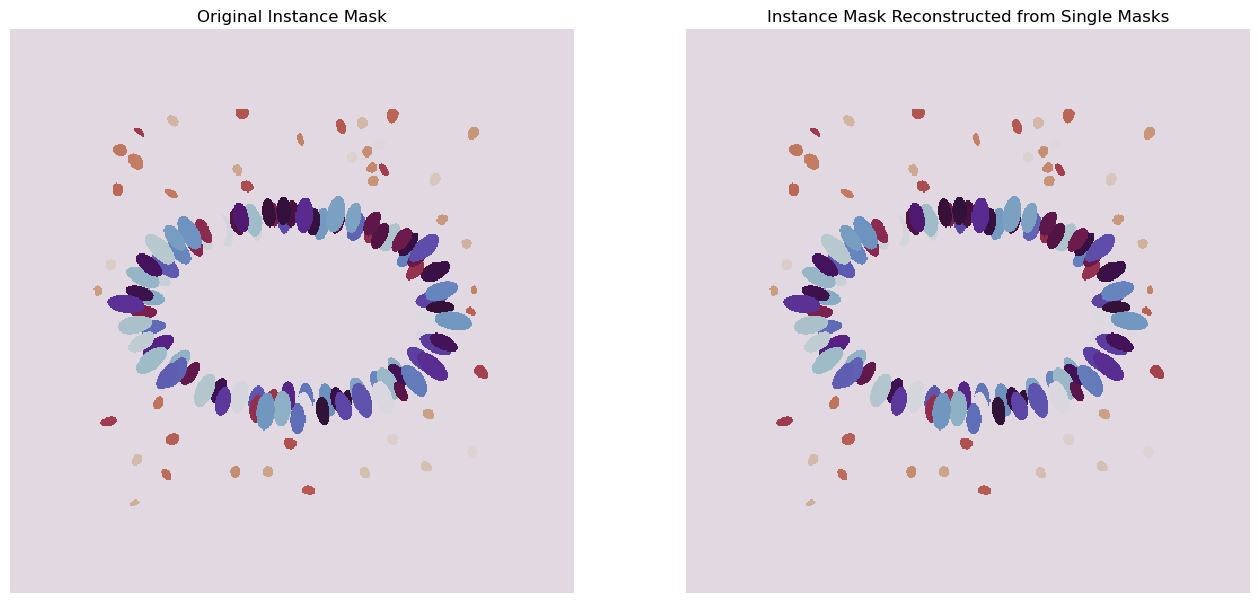

In [36]:
plt.figure(figsize=(16,8))


plt.subplot(121)
plt.imshow(instance_mask, cmap="twilight", interpolation="none")
plt.title("Original Instance Mask")
plt.axis("off")

plt.subplot(122)
plt.imshow(instance_mask_reconstruct, cmap="twilight", interpolation="none")
plt.title("Instance Mask Reconstructed from Single Masks")
plt.axis("off")

#### Show that the reconstructed instance mask has the same values as the original one 

In [37]:
print(np.unique(instance_mask))
print(np.unique(instance_mask_reconstruct.astype(np.uint8)))

[  0   1   3   4   5   6   7   8   9  10  12  14  15  16  17  19  20  21
  22  23  24  25  26  28  29  30  31  32  33  34  35  36  38  39  40  41
  43  44  47  48  50  51  52  53  54  55  57  58  59  60  61  62  63  65
  66  67  69  70  74  78  79  80  81  82  83  84  85  86  88  89  92  93
  94  98 100 101 102 103 105 106 107 109 110 112 114 118 119 120 121 122
 123 125 126 127 128 131 133 134 135 136 137 138 139 140 141 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 160 161 162 163 164
 165 166 168 170 171 172 173 175 178 179]
[  0   1   3   4   5   6   7   8   9  10  12  14  15  16  17  19  20  21
  22  23  24  25  26  28  29  30  31  32  33  34  35  36  38  39  40  41
  43  44  47  48  50  51  52  53  54  55  57  58  59  60  61  62  63  65
  66  67  69  70  74  78  79  80  81  82  83  84  85  86  88  89  92  93
  94  98 100 101 102 103 105 106 107 109 110 112 114 118 119 120 121 122
 123 125 126 127 128 131 133 134 135 136 137 138 139 140 141 143 144 145
 146 147 

In [38]:
n_overlaps = [len(np.unique(np.multiply(np.array(Image.open(path_to_masks.joinpath(single_masks[IDX])))/255, instance_mask))) for IDX in range(len(single_masks))]
ordered_masks = [x for _, x in sorted(zip(n_overlaps, single_masks))]
ordered_masks.reverse()